## Project Description
The aim of this project is to train a classifier to distinguish songs between 2 different genres (Hip-hop & Rock) based only on track information.

In [2]:
import pandas as pd 

data = pd.read_csv('fma-rock-vs-hiphop.csv')
echonest_metrics = pd.read_json('echonest-metrics.json', precise_float=True)

In [3]:
data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [7]:
# merge data based on track_id from track data to echonest_metrics
echo_data = pd.merge(left=data[['track_id', 'genre_top']], right=echonest_metrics, on='track_id')
echo_data.head()

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [8]:
echo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   acousticness      4802 non-null   float64
 3   danceability      4802 non-null   float64
 4   energy            4802 non-null   float64
 5   instrumentalness  4802 non-null   float64
 6   liveness          4802 non-null   float64
 7   speechiness       4802 non-null   float64
 8   tempo             4802 non-null   float64
 9   valence           4802 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 572.7+ KB


In [9]:
# exploring possible correlations
corr_metrics = echo_data.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [13]:
# using PCA to determine how much dimensionality in our data we can reduce and choose the best features

#features
features = echo_data.drop(['genre_top', 'track_id'], axis=1)
labels = echo_data['genre_top']

# importing the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

In [14]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

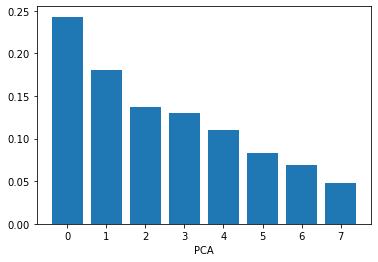

In [15]:
# building a scree-plot that shows number of components against the variance explained by each component
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('PCA')
plt.show()

In [16]:
# Scree-plot does not show a clear 'elbow' for us to decide on an appropriate cutoff
# Another method would be cumulative explained variance plots to determine how many features are required to explain a % of the variance

import numpy as np 

# cumultaive explained variance
cum_exp_variance = np.cumsum(exp_variance)
cum_exp_variance

array([0.24297674, 0.4234199 , 0.55992299, 0.68986388, 0.80042636,
       0.88344881, 0.95268664, 1.        ])

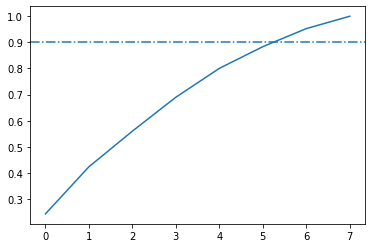

In [18]:
fig, ax = plt.subplots()
ax.plot(range(8), cum_exp_variance)
ax.axhline(y=0.9, linestyle='-.')
plt.show()

# 7 components to explain all the variance

In [23]:
n_components = 7

pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_proj = pca.transform(scaled_train_features)
pca_proj.shape

(4802, 7)

In [24]:
# using a decision tree classifier
from sklearn.model_selection import train_test_split

# splitting the data
train_features, test_features, train_labels, test_labels = train_test_split(pca_proj, labels, stratify=labels)

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

pred_labels_tree = tree.predict(test_features)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels_tree)

0.8567860116569526

In [28]:
labels.value_counts()

# a lot more songs labelled rocks, so dataset is imbalanced. accuracy is not a good metric to evaluate model
# using confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, pred_labels_tree)

array([[158,  70],
       [102, 871]], dtype=int64)

In [33]:
# using logistic regression
from sklearn.linear_model import LogisticRegression

# train log-reg model
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

print(accuracy_score(test_labels, pred_labels_logit))
confusion_matrix(test_labels, pred_labels_logit)

0.8975853455453788


array([[142,  86],
       [ 37, 936]], dtype=int64)

In [38]:
# generate classification report
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_logit = classification_report(test_labels, pred_labels_logit)
print('Decision Tree: \n' + class_rep_tree)
print('Logistic Regression: \n' + class_rep_logit)

Decision Tree: 
              precision    recall  f1-score   support

     Hip-Hop       0.61      0.69      0.65       228
        Rock       0.93      0.90      0.91       973

    accuracy                           0.86      1201
   macro avg       0.77      0.79      0.78      1201
weighted avg       0.87      0.86      0.86      1201

Logistic Regression: 
              precision    recall  f1-score   support

     Hip-Hop       0.79      0.62      0.70       228
        Rock       0.92      0.96      0.94       973

    accuracy                           0.90      1201
   macro avg       0.85      0.79      0.82      1201
weighted avg       0.89      0.90      0.89      1201



In [44]:
# Data is heavily imbalanced, with more rock songs than hip-hop songs
# need to resample using SMOTE (Synthetic Minority Oversampling Technique)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=10)
x_resampled, y_resampled = sm.fit_sample(pca_proj, labels)